## Challenge: Feedback Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
sentiment_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ('review', 'sentiment') 
print(sentiment_raw)

                                                review  sentiment
0    A very, very, very slow-moving, aimless movie ...          0
1    Not sure who was more lost - the flat characte...          0
2    Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of.            0
4    The best scene in the movie was when Gerardo i...          1
5    The rest of the movie lacks art, charm, meanin...          0
6                                  Wasted two hours.            0
7    Saw the movie today and thought it was a good ...          1
8                                 A bit predictable.            0
9    Loved the casting of Jimmy Buffet as the scien...          1
10                And those baby owls were adorable.            1
11   The movie showed a lot of Florida at it's best...          1
12   The Songs Were The Best And The Muppets Were S...          1
13                                   It Was So Cool.            1
14   This 

In [3]:
negative_words = pd.read_csv('neg_sent.txt', delimiter= '\t', header=None)
# print(negative_words)

# re.findall(r'\w+(?:-\w+)+', negative_words)
# negative_words = negative_words.replace('-', ' ', inplace=False, regex=True)

keywords = ['flat', 'lacks', 'vomit', 'bore', 'boring', 'horrible', 'predictable', 'unfortunately',
            'embarrassing', 'stupid', 'lack', 'lacked', 'bland',
            'insult', 'slow-moving', 'aimless', 'bad']

# for words in negative_words:
#     sentiment_raw[str(words)] = sentiment_raw.review.str.contains(
#         str(words),
#         case=False
#     )
    
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.review.str.contains(
        str(key),
        case=False
    )
# print(sentiment_raw)
# print(negative_words)

In [4]:
sentiment_raw['negative'] = (sentiment_raw['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [5]:
print(sentiment_raw['negative'])

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7      False
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
718    False
719    False
720     True
721     True
722     True
723    False
724    False
725     True
726    False
727    False
728    False
729    False
730    False
731    False
732    False
733    False
734    False
735    False
736    False
737    False
738    False
739    False
740    False
741    False
742     True
743     True
744     True
745     True
746     True
747     True
Name: negative, dtype: bool


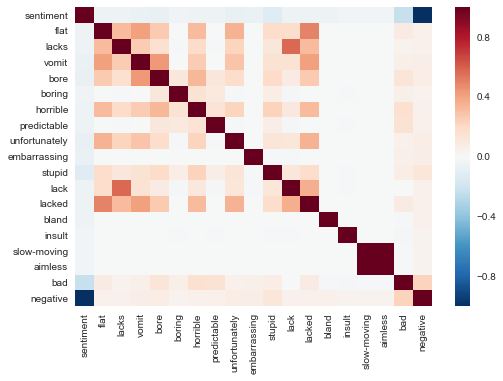

In [6]:
sns.heatmap(sentiment_raw.corr())

In [7]:
data = sentiment_raw[keywords]
target = sentiment_raw['negative']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

crct_labled = data.shape[0] - (target != y_pred).sum()
accuracy = (crct_labled / data.shape[0]) *  100
print("Your accuracy is {}%".format(accuracy))

Number of mislabeled points out of a total 748 points : 277
Your accuracy is 62.96791443850267%
